# Exercise 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clustering_metrics import *

In [2]:
def kmeans(X, c, max_epochs=100, verbose=False):
    c = c.copy() # don't change the original list
    M = X.shape[0]
    K = c.shape[0]
    for t in range(max_epochs):
        C = [[] for _ in range(K)]
        cost = 0
        for i in range(M):
            mindist = np.infty
            for k in range(K):
                euclidean_dist = np.sqrt(np.sum((X[i,] - c[k,])**2))
                if euclidean_dist < mindist:
                    best_k = k
                    mindist = euclidean_dist
            cost += mindist
            C[best_k].append(i)
        for k in range(K):
            c[k,] = np.mean(X[C[k],], axis=0)
        if verbose:
            print("t =", t, "assignments:\n", C, "\ncluster centres:\n", c)
        if t > 0 and C_prev == C: # why t > 1? Don't check on the first iteration; there is no C_prev
            break # for t
        C_prev = [l.copy() for l in C] # deep-copy the list so it won't get modified
    return t, C, c, cost

In [3]:
def davies_bouldin_index(X, C, c, distfunc=euclidean_distance):
    M = X.shape[0]
    K = c.shape[0]
    D = distance_matrix(X, distfunc=distfunc)
    cluster_separation = distance_matrix(c, distfunc=distfunc)
        
    cluster_cohesion = np.zeros(K)
    for k in range(K):
        dists = []
        for i in range(M):
            if np.isin(i, C[k]): # if data point i belongs to cluster k            
                dists.append(distfunc(X[i,], c[k,]))
        cluster_cohesion[k] = np.mean(dists)
#        cluster_cohesion[k] = np.mean(np.sqrt(np.sum(((X[labels==k,] - c[k,])**2), axis=1))) # replaces above five lines
    vals = np.zeros(K)
    for k in range(K):
        vals2 = np.zeros(K)
        for l in range(K):
            if l != k:
                vals2[l] = (cluster_cohesion[l] + cluster_cohesion[k]) / cluster_separation[k,l]
        vals[k] = np.max(vals2)
    return np.mean(vals)

In [4]:
X = np.array([[2.5, 2.7],
             [2.7,3.1],
             [3.0,3.0],
             [-5.5,2.6],
             [-6.0,3.0],
             [-4.8,2.6],
             [-4.5,2.8],
             [-2.0,-9.3],
             [-1.5,-13.6],
             [-1.7,-7.4]])
C = [[0,1,2],[3,4,5,6,7,8,9]]
c = np.array([[2.73,2.93],[-3.71,-2.76]])
print("Davies-Bouldin index with two clusters:", davies_bouldin_index(X, C, c))

Davies-Bouldin index with two clusters: 0.7917392406406847


In [5]:
C = [[0,1,2],[7,8,9],[3,4,5,6]]
c = np.array([[2.73,2.93],[-1.73,-10.1],[-5.2,2.75]])
print("Davies-Bouldin index with three clusters:", davies_bouldin_index(X, C, c))

Davies-Bouldin index with three clusters: 0.20973127710930084


In [6]:
df = pd.read_csv("../data/WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv", low_memory=False)
df

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182.0,172.0,185,-1130.0,1400.0,-863.0,E
3,eurico,1322489729,82654,28/11/2011 14:15,no,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185.0,182.0,188,-1120.0,1400.0,-855.0,E
4,eurico,1322489729,90637,28/11/2011 14:15,no,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188.0,195.0,188,-1100.0,1400.0,-843.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39237,adelmo,1322832937,596287,02/12/2011 13:35,no,864,145.00,-35.3,130.0,19,...,1.59,-1.36,0.00,-271.0,-91.0,-43,-151.0,-635.0,-36.0,E
39238,adelmo,1322832937,636283,02/12/2011 13:35,no,864,145.00,-35.5,130.0,19,...,1.54,-1.20,0.05,-263.0,-99.0,-45,-116.0,-654.0,-70.0,E
39239,adelmo,1322832937,672400,02/12/2011 13:35,no,864,144.00,-35.7,131.0,19,...,1.53,-1.04,0.07,-263.0,-117.0,-49,-98.0,-671.0,-70.0,E
39240,adelmo,1322832937,964299,02/12/2011 13:35,no,864,143.00,-35.9,131.0,18,...,1.48,-0.90,0.05,-270.0,-141.0,-51,-68.0,-678.0,-98.0,E


In [7]:
cols = [i for i in list(df.columns) if i.startswith('accel') 
          or i.startswith('gyros') 
          or i.startswith('magnet') 
          or i.startswith('pitch') 
          or i.startswith('roll') 
          or i.startswith('yaw')]
print(len(cols))
X = np.array(df.loc[:,cols])
y = np.array(df.loc[:,"classe"])
np.random.seed(888)
ind = np.random.choice(X.shape[0], size=100, replace=False)
X = X[ind,]
y = y[ind,]
print(X.shape)
print(np.unique(y))

48
(100, 48)
['A' 'B' 'C' 'D' 'E']


In [8]:
Ks = range(2,11)
R = 10
Dunn_index = []
Silhouette_index = []
Purity = []
DB_index = []
verbose = False # set to True to find out what is taking so long
for K in Ks:
    di = []
    dbi = []
    si = []
    pu = []
    print("K:", K)
    np.random.seed(777)
    for r in range(R):
#        print("r:", r)
        # randomly initialize cluster centres
        ind = np.random.choice(range(X.shape[0]), K, replace=False)
        c = X[ind,]
        t, C, c, cost = kmeans(X, c)
        if verbose: print("K-Means: Done")
        di.append(dunn_index(X, C, c))
        si.append(silhouette(X, C, c))
        pu.append(purity(C, y))
        dbi.append(davies_bouldin_index(X, C, c))
        if verbose: print("Cluster-valiation: Done")
    Dunn_index.append(np.mean(di))
    Silhouette_index.append(np.mean(si))
    Purity.append(np.mean(pu))
    DB_index.append(np.mean(dbi))

K: 2
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8
K: 9
K: 10


/opt/conda/envs/python/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/python/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Davies Bouldin index')

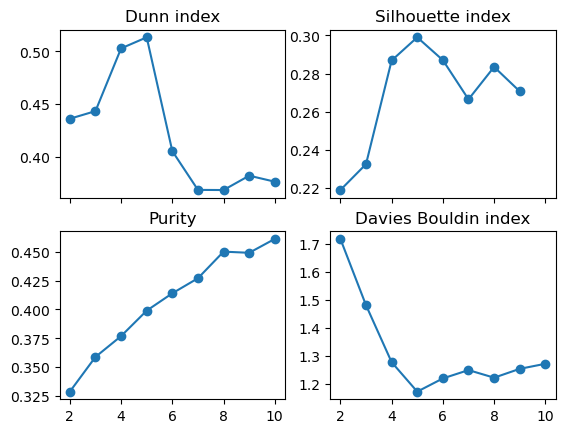

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True)
ax1.plot(Ks, Dunn_index, 'o-')
ax1.set_title("Dunn index")
ax2.plot(Ks, Silhouette_index, 'o-')
ax2.set_title("Silhouette index")
ax3.plot(Ks, Purity, 'o-')
ax3.set_title("Purity")
ax4.plot(Ks, DB_index, 'o-')
ax4.set_title("Davies Bouldin index")